In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**CONCATENATING DIFFERENT MONTH SALES TABLES TO GET FULL INFORMATION**

In [2]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Sales_April_2019.csv', '/content/drive/MyDrive/Sales_August_2019.csv','/content/drive/MyDrive/Sales_December_2019.csv',
    '/content/drive/MyDrive/Sales_February_2019.csv','/content/drive/MyDrive/Sales_January_2019.csv','/content/drive/MyDrive/Sales_July_2019.csv','/content/drive/MyDrive/Sales_June_2019.csv',
    '/content/drive/MyDrive/Sales_March_2019.csv','/content/drive/MyDrive/Sales_May_2019.csv','/content/drive/MyDrive/Sales_November_2019.csv','/content/drive/MyDrive/Sales_October_2019.csv','/content/drive/MyDrive/Sales_September_2019.csv']), ignore_index=True)
df.head(30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


**CONFIGURING THE SHAPE OF THE DATASET**

In [3]:
df.shape

(186850, 6)

**CHECKING IF THE MISSING VALUES CONSTITUTE A MAJOR OR A MINOR PORTION OF THE DATASET**

Since the missing values are a meager percentage of 0% of the whole dataset,therefore we can choose to drop them.

In [6]:
545/186850

0.002916778164302917

Finding null values

In [4]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

The dataset contains 545 null values.

Dropping null values

In [5]:
df.dropna(inplace=True)

Q 1) Which month had the best sales? How much sales happened in that month?

Adding the month column and removing noise values to change the dataype.

In [6]:
df['Month']=df['Order Date'].str[0:2]
df['Month']=pd.to_numeric(df['Month'],errors='coerce')

In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0


Changing the datatype of Quantity ordered column

In [8]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each']=pd.to_numeric(df['Price Each'],errors='coerce')

Added a Sales column by multiplying quantity with per unit price of the product.

In [9]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

Best month for sales

In [10]:
total_sales=df.groupby('Month').sum()
total_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1.0,10903.0,1811768.38,1822256.73
2.0,13449.0,2188884.72,2202022.42
3.0,17005.0,2791207.83,2807100.38
4.0,20558.0,3367671.02,3390670.24
5.0,18667.0,3135125.13,3152606.75
6.0,15253.0,2562025.61,2577802.26
7.0,16072.0,2632539.56,2647775.76
8.0,13448.0,2230345.42,2244467.88
9.0,13109.0,2084992.09,2097560.13


DECEMBER HAD THE BEST SALES OF THE YEAR

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

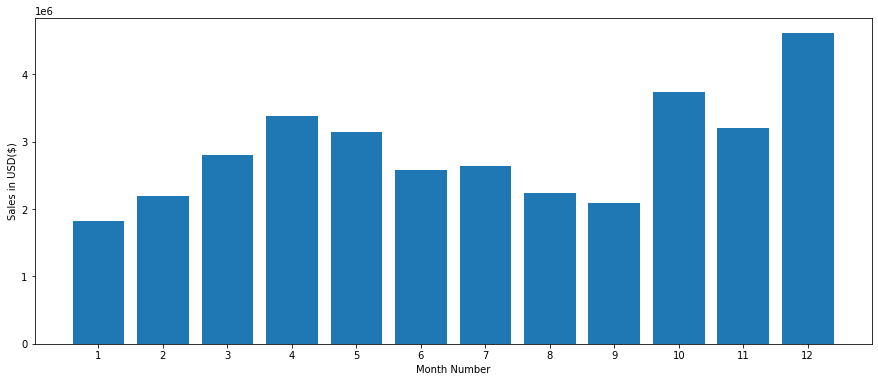

In [12]:
plt.figure(figsize=(15,6))
months=range(1,13)
plt.bar(months,total_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

Q2) Which city has the highest number of sales?

Step 1: Extracting City from the address

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Month             185950 non-null  float64
 7   Sales             185950 non-null  float64
dtypes: float64(4), object(4)
memory usage: 12.8+ MB


Step 2: Retrieving the city name from the address column by splitting and slicing.

In [14]:
df['City']=df['Purchase Address'].str.split(',').str[1]

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles


Finding the city with the Maximum sales

In [16]:
city_max_sales=df.groupby('City').sum()
city_max_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602.0,2779908.20,104794.0,2795498.58
Austin,11153.0,1809873.61,69829.0,1819581.75
Boston,22528.0,3637409.77,141112.0,3661642.01
Dallas,16730.0,2752627.82,104620.0,2767975.40
Los Angeles,33289.0,5421435.23,208325.0,5452570.80
New York City,27932.0,4635370.83,175741.0,4664317.43
Portland,14053.0,2307747.47,87765.0,2320490.61
San Francisco,50239.0,8211461.74,315520.0,8262203.91
Seattle,16553.0,2733296.01,104941.0,2747755.48


In [17]:
cities=df['City'].unique()
cities

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin', nan],
      dtype=object)

In [18]:
df['City'].dropna(inplace=True)

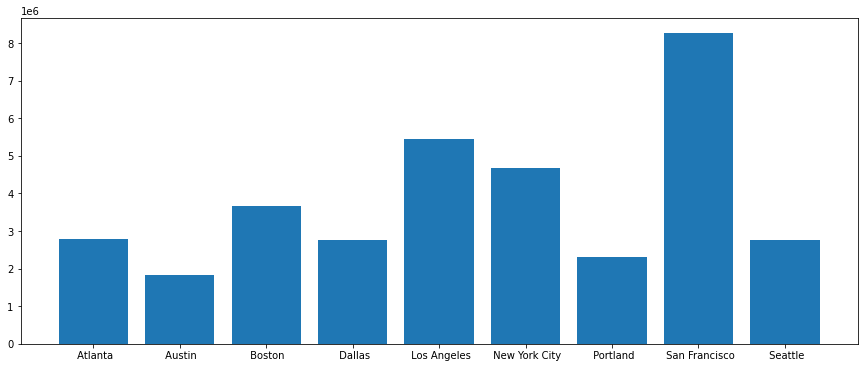

In [19]:
plt.figure(figsize=(15,6))
cities=[city for city,i in df.groupby('City')]
plt.bar(cities,city_max_sales['Sales'])
plt.show()

Q3) **At what time should we advertise the product to maximise the likelihood of the customer buying the product?**

Step 1: Converting the oredrdate column to a datetime format

In [20]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

Creating a new column of Hour.

In [21]:
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,8.0,46.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,22.0,30.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14.0,38.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,9.0,27.0


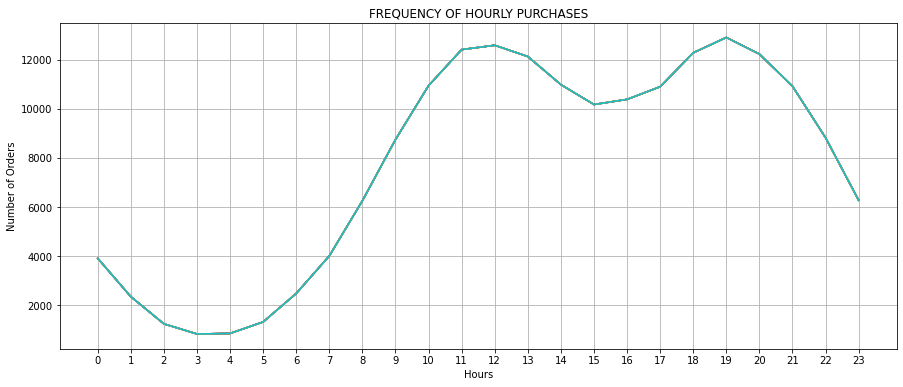

In [22]:
plt.figure(figsize=(15,6))
hours=[hour for hour,i in df.groupby('Hour')]
plt.plot(hours,df.groupby('Hour').count())
plt.xticks(hours)
plt.title('FREQUENCY OF HOURLY PURCHASES')
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

**Q4) WHAT PRODUCTS ARE OFTEN SOLD TOGETHER?**

In [23]:
new_df=df[df['Order ID'].duplicated(keep=False)]
new_df['Grouped Items']=new_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped Items
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14.0,38.0,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14.0,38.0,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,19.0,42.0,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles,19.0,42.0,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,99.99,Boston,11.0,31.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9.0,3.84,Atlanta,20.0,18.0,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9.0,11.99,Atlanta,0.0,25.0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9.0,5.98,Atlanta,0.0,25.0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9.0,600.00,San Francisco,13.0,49.0,"Google Phone,USB-C Charging Cable"


Dropping duplicate rows

In [24]:
new_df=new_df[['Order ID','Grouped Items']].drop_duplicates()
new_df

,Order ID,Grouped Items
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


Counting the frequency of occurence of pairs of items bought together

In [25]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in new_df['Grouped Items']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
  print(key,value)


('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


Q5) **WHICH PRODUCT WAS SOLD THE MOST? WHY DO YOU THINK IT WAS SOLD THE MOST?**

In [26]:
product_sum=df.groupby('Product')
total_quantity=product_sum['Quantity Ordered'].sum()
total_quantity

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
Product                           0.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [35]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Minute              0
dtype: int64

In [34]:
df.dropna(inplace=True)

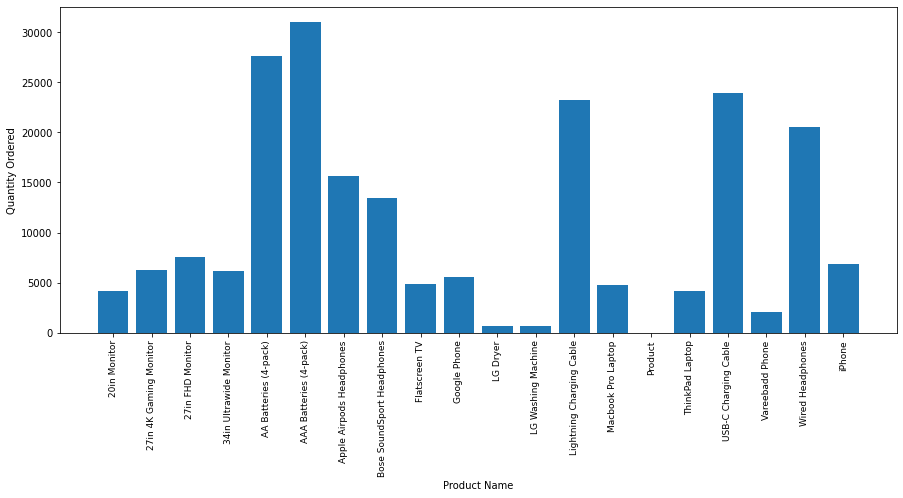

In [27]:
plt.figure(figsize=(15,6))
products=[product for product,i in product_sum]
plt.bar(products,total_quantity)
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.xticks(products,rotation='vertical',size=9)
plt.show()